# Pymaceuticals Inc.
---

### Analysis

After analyzing the data provided, I found some interesting information. For example Capomulin and Ramicane are the 2 treatmeants seem to be having the moist effective results on the mice. Both have an average tumor volume of 40.67 and 40.21 while all others are at 52 and above.
If comparing the 2 then Ramicane actually is having slightly better results in both median tumor volume as well as the standard deviation of the volumes. Ramicane has a median of 40.48 and a standard deviation of 4.84. Capomulin comes in at slightly higher numbers with a median of 41.55 and a standard deviation of 4.99.
Looking at the opposite end of things at the treatments that are least effective, Ketapril comes in at an average tumor volume of 55.23. median of 53.69 making it the least effective. Coming in second to last in effectiveness is Neftisol with an average of 54.33 and a median of 52.50.
Next, when observing mouse l509 with treatment on capomulin it did seem that it took a little under 20 days for the treatment to take effect. During this time the tumor kept growing but then shrunk to being smaller than it's original size in just a few days before it continued a pattern of growing a small amount, and shrinking a substantial amount afterwards.
Lastly when comparing the mices weight and the tumor volume it did seem that the weight of the mouse had an effect on the size of the tumor. The heavier the mouse the bigger the tumor in most cases which is shown with the correlation and regression bar in the last scatter plot.
All in all I found that the most effective treatment for tumor growth in the mice is Capomulin and the worst being Ketapril.
 

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [256]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [257]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id = duplicate_mice[0]
duplicate_mice

array(['g989'], dtype=object)

In [258]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = merged_df[merged_df['Mouse ID'] == duplicate_mice_id]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [259]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] != duplicate_mice_id]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [260]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = cleaned_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = cleaned_df['Drug Regimen'].sort_values().unique()
mean_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_stats = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume, 'Median Tumor Volumes':median_tumor_volume,
                            'Tumor Volume Variance':variance_tumor_volume,
                            'Tumor Volume Std. Dev.':stdev_tumor_volume, 'Tumor Volume Std. Err.':sem_tumor_volume},
                            index= drug_regimen)
# Rename the Index to Drug Regimen
tumor_stats = tumor_stats.rename_axis('Drug Regimen')
tumor_stats

,Mean Tumor Volume,Median Tumor Volumes,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [262]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
new_tumor_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).set_index(drug_regimen)
# Rename the Index to Drug Regimen
new_tumor_stats = new_tumor_stats.rename_axis('Drug Regimen')
new_tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

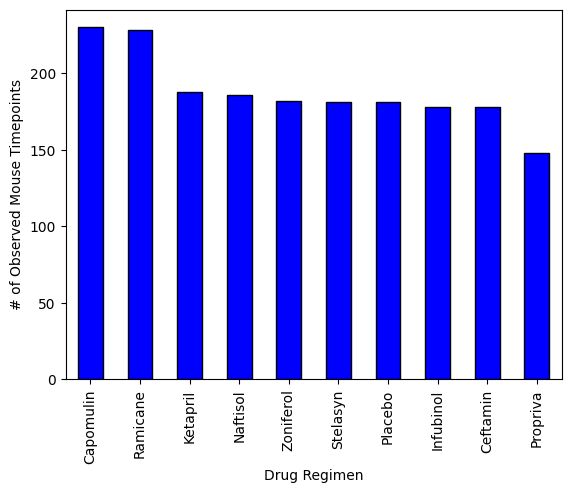

In [263]:
# Count number of rows for each drug regimen
drug_count = cleaned_df['Drug Regimen'].value_counts()
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count.plot(kind='bar', color='blue', edgecolor='black', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')


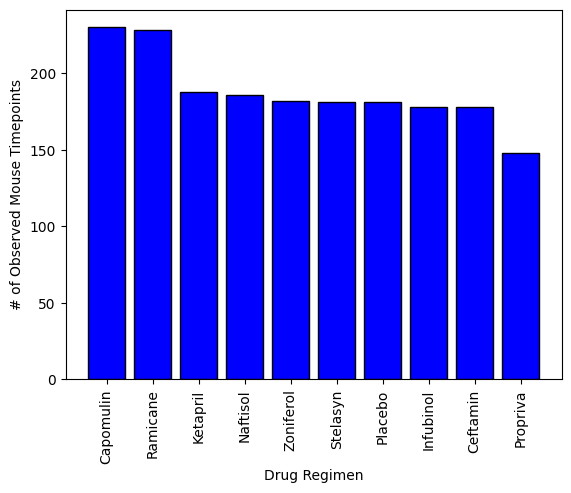

In [264]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count.index, drug_count, color='blue', edgecolor='black')
# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# Rotate xlabels by 90 degrees
plt.xticks(rotation=90)
# Show the bar plot
plt.show()

<Axes: ylabel='Sex'>

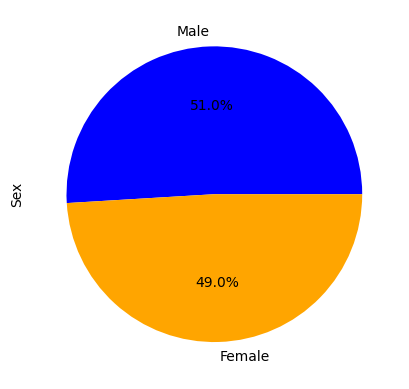

In [265]:
# Count number of mice for each sex
sex_count = cleaned_df['Sex'].value_counts()
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], ylabel='Sex')

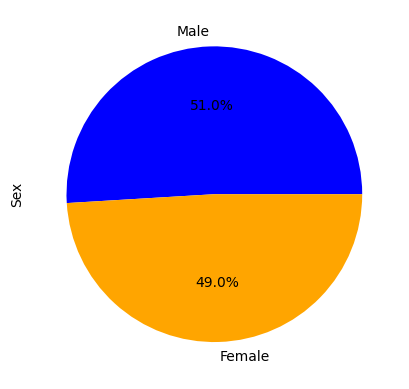

In [266]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', colors=['blue', 'orange'])
# Add ylabel
plt.ylabel('Sex')
# Show the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [273]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
drugs_df = cleaned_df[cleaned_df['Drug Regimen'].isin(drugs)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_drugs_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'])

In [268]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = new_drugs_df[new_drugs_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset 
    tumor_vol.append(drug_data)
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile-lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    # Print Results
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


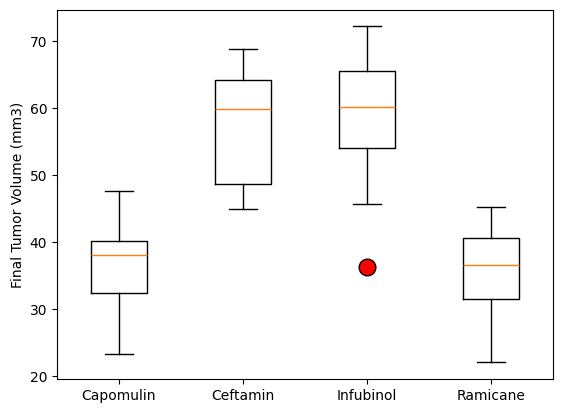

In [269]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = drugs, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

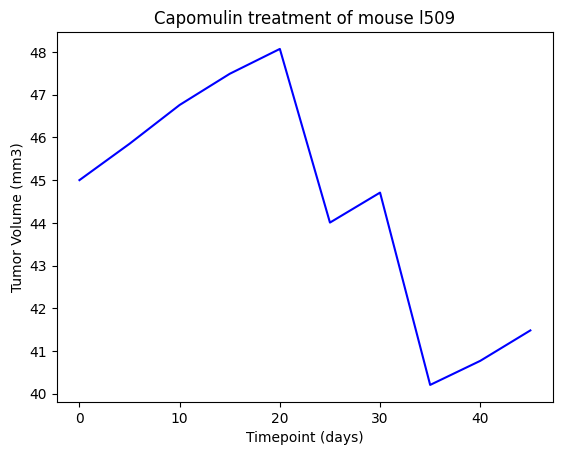

In [270]:
# Create Variable for the mouse
mouse = 'l509'
# Create a new df for the mouses information
mouse_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == mouse)]
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='blue')

# Add labels and title
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

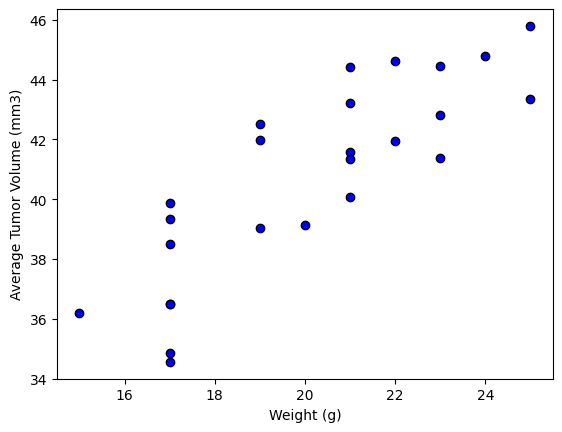

In [271]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create a new dataframe for only the capomulin treatment
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
# Calculate average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Grab weight values for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
# Generate scatter plot
plt.scatter(mouse_weights, avg_tumor_vol, color='blue', edgecolors='black')
# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


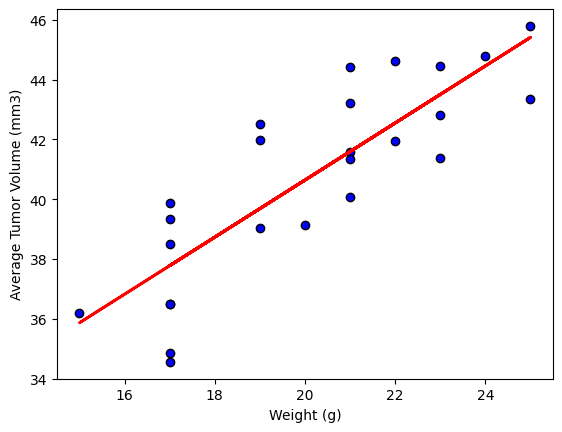

In [272]:
# Calculate the correlation coefficient
correlation_coefficient = round(mouse_weights.corr(avg_tumor_vol), 2)
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, avg_tumor_vol)
# Generate scatter plot with regression line
plt.scatter(mouse_weights, avg_tumor_vol, color='blue', edgecolors='black')
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red', linestyle='-', linewidth=2)
# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Print correlation
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')
